# 1. Установка


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline



## 2. **Обучение**


In [3]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}
def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [4]:
import os
import glob as gb

# путь к файлам
base_path = '/content/drive/MyDrive/youtubevid/imageclassMS002'

# картинки на обучение в какой папке
train_path = os.path.join(base_path, 'Multiple Sclerosis')

folders = os.listdir(train_path)

for folder in folders:
    # полный путь к папке с картинками
    folder_path = os.path.join(train_path, folder)

    # получаем файлы из папки
    files = gb.glob(os.path.join(folder_path, '*.png'))

    # пишем что нашли в папке с картинками
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 1002 in folder Control-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 761 in folder MS-Sagittal


In [5]:
s = 150
import cv2

In [6]:
x_train= []
y_train= []
for folder in folders:
    # получаем полный путь
    folder_path = os.path.join(train_path, folder)
    # получаем списк картинок в папке
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [7]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


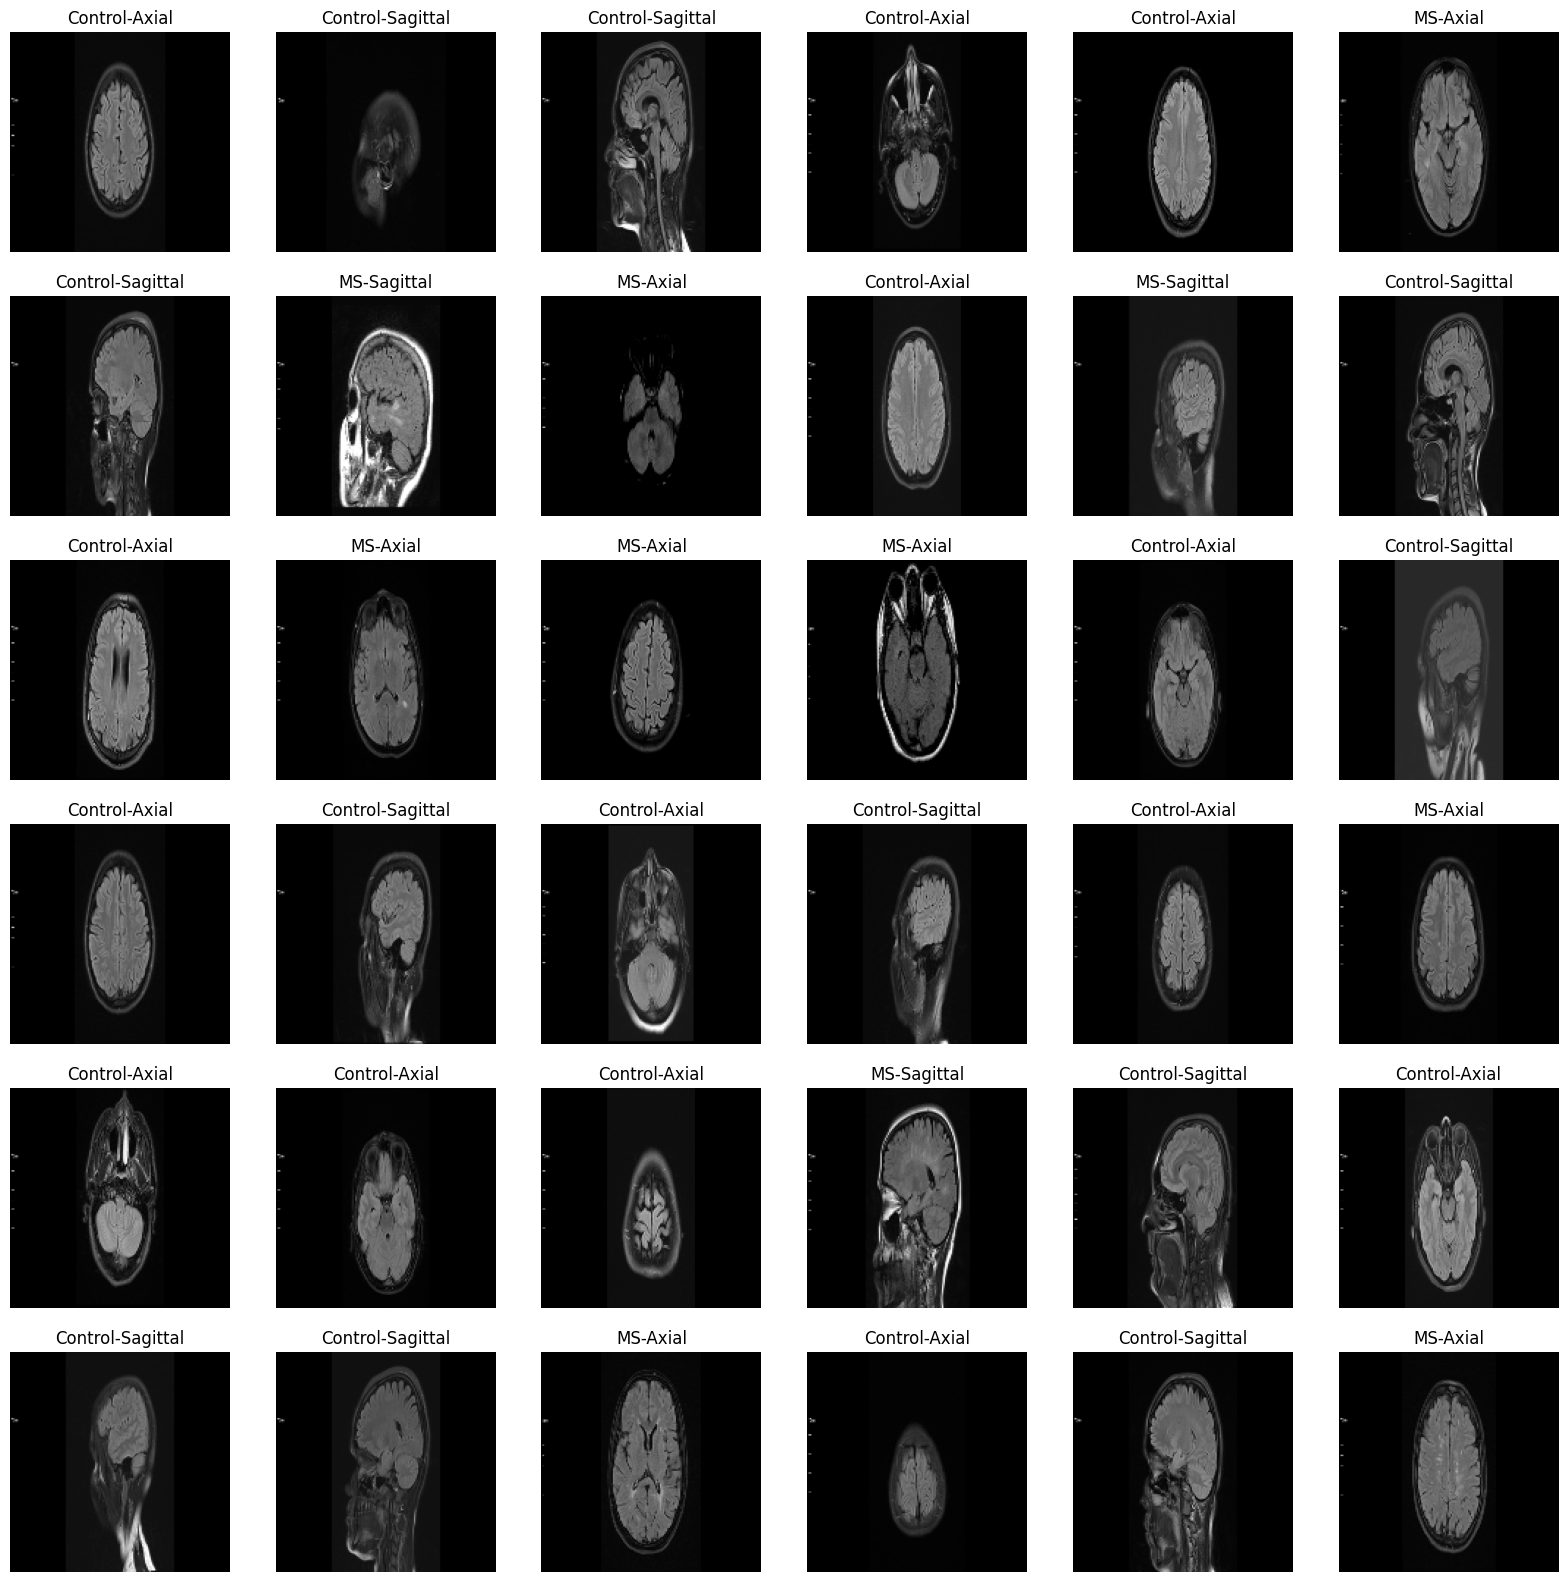

In [8]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [9]:
from keras.layers import MaxPooling2D,Dropout

In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

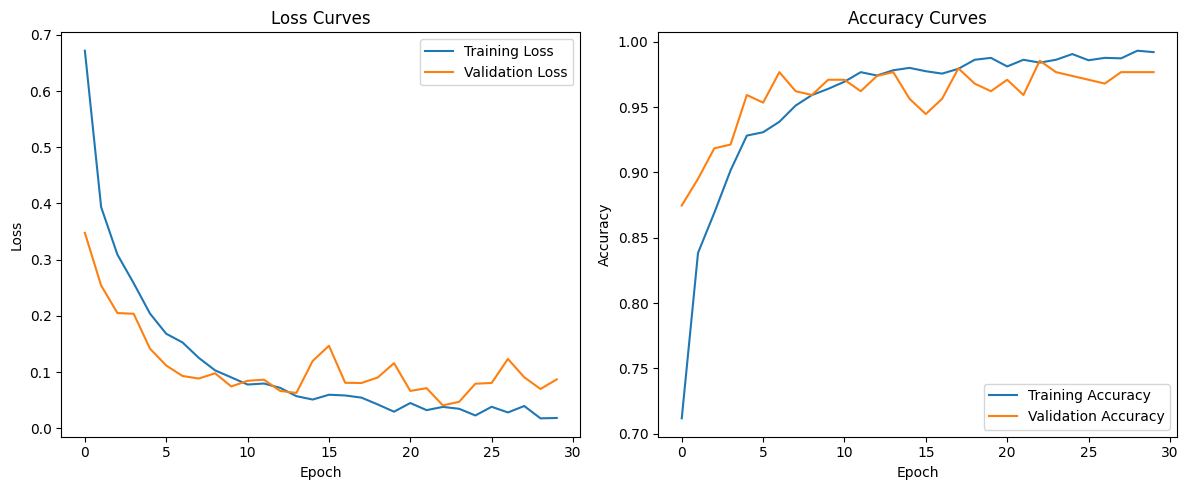

In [11]:

# делим данные на трейн и валидацию
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# нормализируем данные от [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# количество классов
num_classes = 4

# строим  модель
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # последний слой с количеством классов

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

model.summary()

# One-hot encode
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

# тренируем
history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

# Оцениваем модель
y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print("Test accuracy:", test_accuracy)

11/11 [==============================] - 0s 10ms/step - loss: 0.4907 - accuracy: 0.9563
Test accuracy: 0.9562682509422302


11/11 [==============================] - 0s 12ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.98      0.96       102
     Class 1       0.99      0.97      0.98       105
     Class 2       0.95      0.88      0.92        68
     Class 3       0.94      0.97      0.96        68

    accuracy                           0.96       343
   macro avg       0.96      0.95      0.95       343
weighted avg       0.96      0.96      0.96       343

Weighted Precision: 0.9568
Weighted Recall: 0.9563
Weighted F1-score: 0.9560


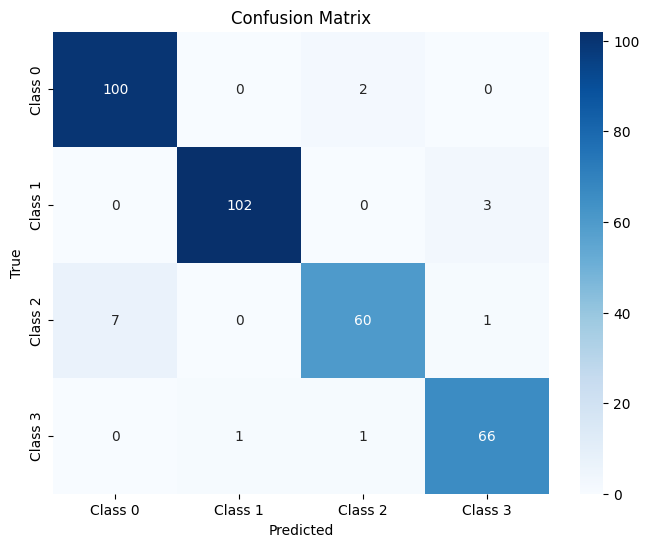

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# confusion matrix
true_labels = y_test
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)],
            yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## 3. Тестируем

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from keras import backend as K
from tensorflow.python.framework import ops

In [35]:
img_size = (150, 150)
# путь к файлу теста
img_temp1 = cv2.imread('/content/drive/MyDrive/youtubevid/imageclassMS002/test/7.png')
img_temp = cv2.resize(img_temp1, img_size)
img_temp = img_temp.astype('float32') / 255.0
img_temp= np.array(img_temp)
img_temp = np.expand_dims(img_temp, axis=0)
_shape_1= img_temp.shape
print("The shape of image is:",_shape_1)

The shape of image is: (1, 150, 150, 3)


1/1 [==============================] - 0s 18ms/step
The predicted class is: MS-Sagittal


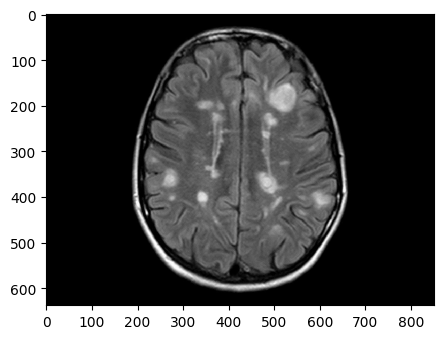

In [36]:
predictions_one_hot = model.predict(img_temp)
predicted_class = np.argmax(predictions_one_hot, axis=1)
class_names = ["Control-Axial", "Control-Sagittal", "MS-Axial", "MS-Sagittal"]
predicted_class_name = class_names[predicted_class[0]]
print(f"The predicted class is: {predicted_class_name}")
plt.figure(figsize=(5,5))
plt.imshow(img_temp1)
plt.show()

